### Plotting Exact Wavefunction densities

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif',serif='Sans')
mpl.rc('font', size=16)
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def read_wfn(filename):
    file = open(filename, 'r')
    n = int(file.readline())
    comment = file.readline()
    comment += file.readline()
    wfn = np.zeros((n),dtype=complex)
    for i in range(n):
        a,b = file.readline().split(',')
        a = float(a.split('(')[1])
        b = float(b.split(')')[0])
        wfn[i] = complex(a,b)
    file.close()
    ndim = int(np.sqrt(n))
    wfn = wfn.reshape(ndim, ndim).T[::-1]
    return wfn

def plot_density(density, x0=15.0, title='', suptitle='',
                   savefig=False, plot_filename='plot.png',
                   xlim=[],ylim=[]):
    fig, ax = plt.subplots(figsize=(8,6))
    vmax = np.max(density)
    vmin = -np.max(density)
    im = ax.imshow(density, cmap='bwr_r', 
                   extent=[-x0,x0,-x0,x0])
    ax.set_xlabel('x1 (a.u.)')
    ax.set_ylabel('x2 (a.u.)')
    plt.colorbar(im)
    if xlim == []:
        xlim=[-7.5, 7.5]
    if ylim == []:
        ylim=[-7.5, 7.5]
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_title(title)
    plt.suptitle(suptitle)
    if savefig:
        fig.tight_layout()
        fig.savefig(plot_filename, dpi=300)
    return fig, ax

def plot_atom_densities(z, xlim=[-10,10],ylim=[-10,10]):
    alpha = ['1e00', '1e-1', '1e-2']
    beta = ['1e00', '1e-1', '1e-2']
    ngrid = [128]
    atomdir = 'z_{z}'.format(z=z)
    job_dict = {}
    for a in alpha:
        for b in beta:
            jobdir = 'alpha_{a}_beta_{b}'.format(a=a,b=b)
            grid_dict = {}
            for n in ngrid:
                ndir = 'n_{n}'.format(n=n)
                path='../{atomdir}/{jobdir}/{ndir}'.format(atomdir=atomdir,jobdir=jobdir, ndir=ndir)
                wfn_filename = os.path.join(path,'psi_exact.wfn')
                wfn = read_wfn(wfn_filename)
                density = np.real(np.conjugate(wfn)*wfn)
                plot_filename = '../images/rho_{atom}_{job}_{n}.png'.format(atom=atomdir, job=jobdir, n=ndir)
                title = 'Z={z} alpha={a} beta={b} n={n}'.format(z=z,a=a,b=b,n=n)
                fig, ax = plot_density(density, x0=15.0, savefig=True, 
                                         plot_filename=plot_filename,
                                         title=title, suptitle='Density Plot',
                                         xlim=xlim, ylim=ylim)


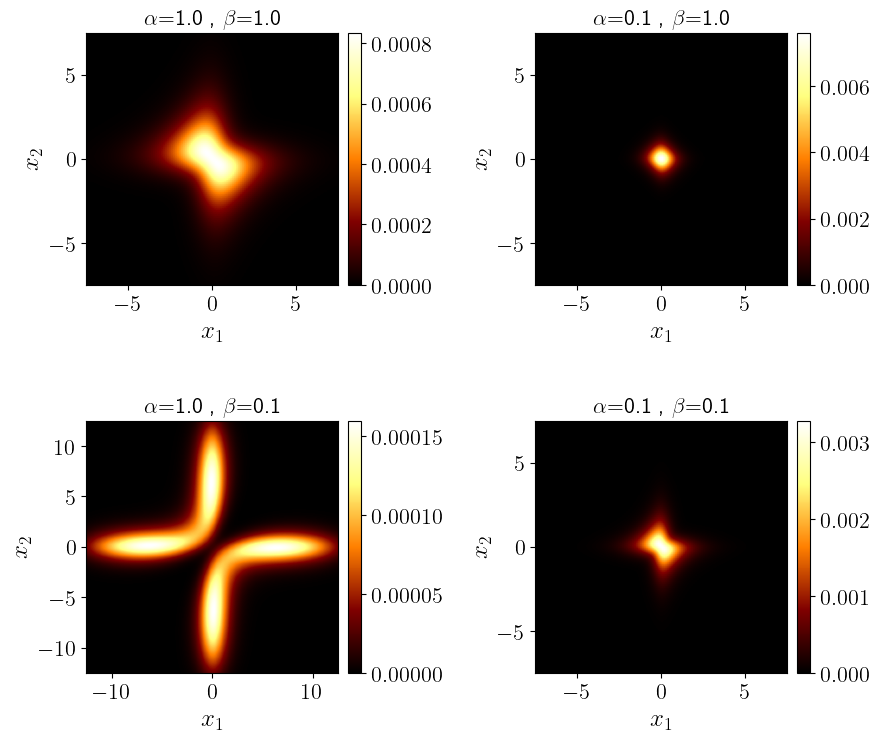

In [3]:
z = 1
n = 256
x0 = 15.0
fig, ax = plt.subplots(2,2, figsize=(9,8))
alpha = ['1e00','1e-1']
ax = ax.T
for i in range(2):
    for j in range(2):
        a = alpha[i]
        b = alpha[j] 
        path = '../z_{z}/alpha_{a}_beta_{b}/n_{n}/'.format(z=z,a=a,b=b,n=n)
        filename = 'psi_itp.wfn'
        try:
            wfn = read_wfn(os.path.join(path,filename))
            density = np.real(wfn*np.conjugate(wfn))
            vmax = np.max(density)
            vmin = -np.max(density)
            im = ax[i,j].imshow(density, cmap='afmhot', 
                            vmax=vmax, vmin=0,
                        extent=[-x0,x0,-x0,x0])
            divider = make_axes_locatable(ax[i,j])
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = plt.colorbar(im, cax=cax)
            title = r'$\alpha$={a} , $\beta$={b}'.format(a=float(a),b=float(b))
            ax[i,j].set_title(title, fontsize=16)
            ax[i,j].set_xlabel(r'$x_{1}$', fontsize=18)
            ax[i,j].set_ylabel(r'$x_{2}$', fontsize=18)
            ax[i,j].set_xlim(-x0/2, x0/2)
            ax[i,j].set_ylim(-x0/2, x0/2)
        except:
            pass
ax[0,1].set_xlim(-(x0/1.2), x0/1.2)
ax[0,1].set_ylim(-x0/1.2, x0/1.2)
fig.tight_layout()
fig.savefig('../images/z_1_density.png',dpi=300)
fig.savefig('../images/z_1_density.pdf',dpi=300)
plt.show()

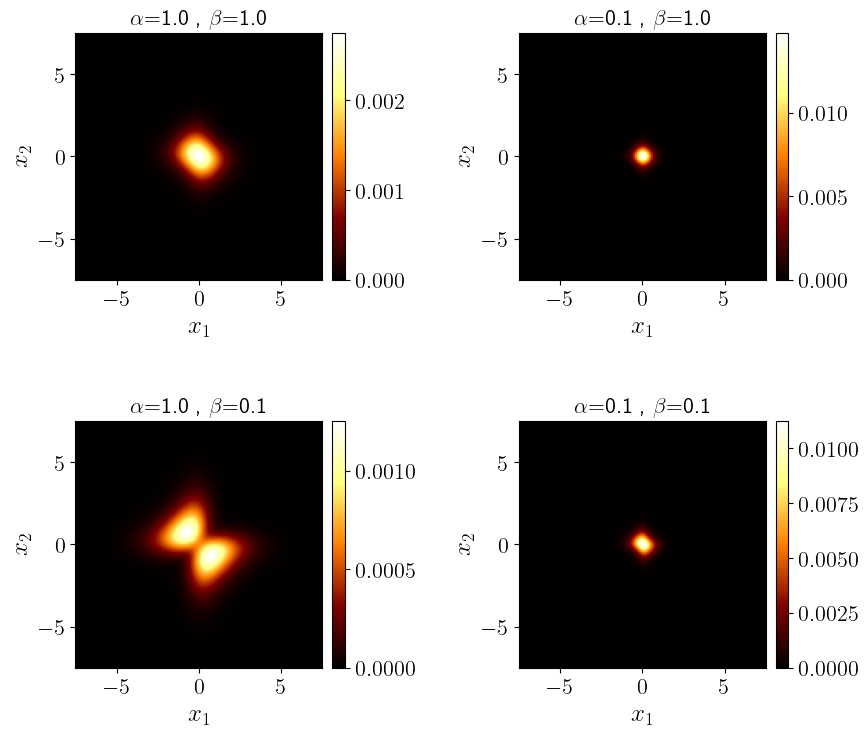

In [4]:
z = 2
n = 256
x0=15.0
fig, ax = plt.subplots(2,2, figsize=(9,8))
alpha = ['1e00','1e-1']
ax = ax.T
for i in range(2):
    for j in range(2):
        a = alpha[i]
        b = alpha[j] 
        path = '../z_{z}/alpha_{a}_beta_{b}/n_{n}/'.format(z=z,a=a,b=b,n=n)
        filename = 'psi_itp.wfn'
        try:
            wfn = read_wfn(os.path.join(path,filename))
            density = np.real(wfn*np.conjugate(wfn))
            vmax = np.max(density)
            vmin = -np.max(density)
            im = ax[i,j].imshow(density, cmap='afmhot', 
                            vmax=vmax, vmin=0,
                        extent=[-x0,x0,-x0,x0])
            divider = make_axes_locatable(ax[i,j])
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = plt.colorbar(im, cax=cax)
            title = r'$\alpha$={a} , $\beta$={b}'.format(a=float(a),b=float(b))
            ax[i,j].set_title(title, fontsize=16)
            ax[i,j].set_xlabel(r'$x_{1}$', fontsize=18)
            ax[i,j].set_ylabel(r'$x_{2}$', fontsize=18)
            ax[i,j].set_xlim(-x0/2, x0/2)
            ax[i,j].set_ylim(-x0/2, x0/2)
        except:
            pass

fig.tight_layout()
fig.savefig('../images/z_2_density.png',dpi=300)
fig.savefig('../images/z_2_density.pdf',dpi=300)
plt.show()

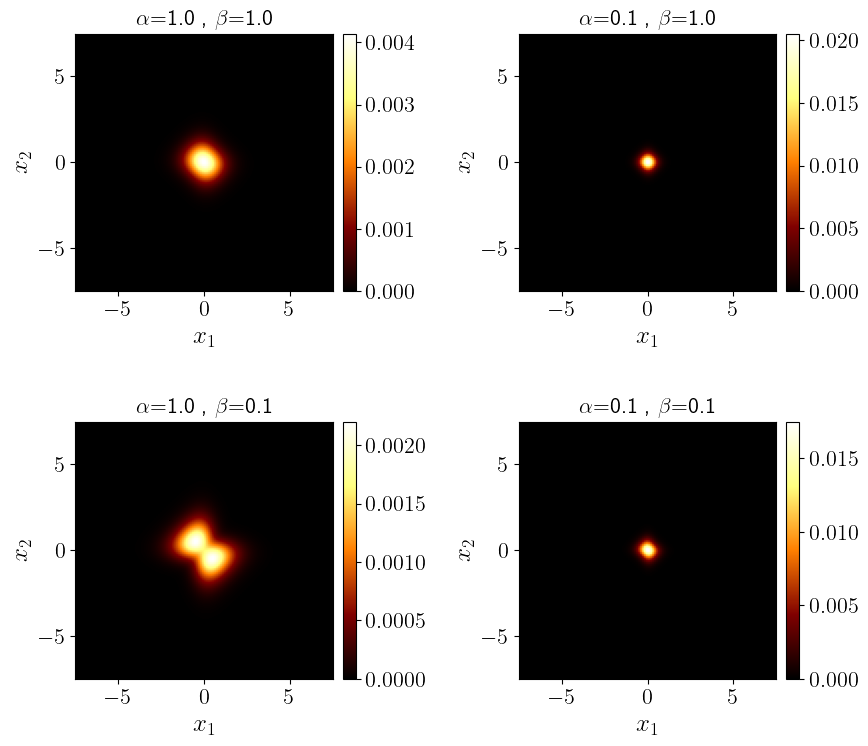

In [5]:
z = 3
n = 256
x0=15.0
fig, ax = plt.subplots(2,2, figsize=(9,8))
alpha = ['1e00','1e-1']
ax = ax.T
for i in range(2):
    for j in range(2):
        a = alpha[i]
        b = alpha[j] 
        path = '../z_{z}/alpha_{a}_beta_{b}/n_{n}/'.format(z=z,a=a,b=b,n=n)
        filename = 'psi_itp.wfn'
        try:
            wfn = read_wfn(os.path.join(path,filename))
            density = np.real(wfn*np.conjugate(wfn))
            vmax = np.max(density)
            vmin = -np.max(density)
            im = ax[i,j].imshow(density, cmap='afmhot', 
                            vmax=vmax, vmin=0,
                        extent=[-x0,x0,-x0,x0])
            divider = make_axes_locatable(ax[i,j])
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = plt.colorbar(im, cax=cax)
            title = r'$\alpha$={a} , $\beta$={b}'.format(a=float(a),b=float(b))
            ax[i,j].set_title(title, fontsize=16)
            ax[i,j].set_xlabel(r'$x_{1}$', fontsize=18)
            ax[i,j].set_ylabel(r'$x_{2}$', fontsize=18)
            ax[i,j].set_xlim(-x0/2, x0/2)
            ax[i,j].set_ylim(-x0/2, x0/2)
        except:
            pass

fig.tight_layout()
fig.savefig('../images/z_3_density.png',dpi=300)
fig.savefig('../images/z_3_density.pdf',dpi=300)
plt.show()